In [2]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
    py_file_location = "/content/drive/MyDrive/Tesis/Git/RedVolcanica"
    %cd "{py_file_location}" 
    IN_COLAB = True
except:
    IN_COLAB = False
print(IN_COLAB)  

False


In [3]:
import importlib

import RedFunciones.visualizacion as visualizacion
import RedFunciones.Generador as Generador
import RedFunciones.Discriminador as Discriminador
import RedFunciones.auxiliares as auxiliares
import RedFunciones.DataloaderVol as DataloaderVol
import RedFunciones.Checkpoint as Checkpoint

importlib.reload(auxiliares)
importlib.reload(visualizacion)
importlib.reload(Generador)
importlib.reload(Discriminador)
importlib.reload(DataloaderVol)
importlib.reload(Checkpoint)

import Auxiliares.BinaryAccuracy as bin_acc

In [4]:
import torch
from torch import nn
import torchaudio

from tqdm.auto import tqdm # Progress bar

from torchvision import transforms
from torchvision.utils import make_grid
from torchvision.datasets import MNIST #noned

from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

torch.manual_seed(0) # Set for our testing purposes, please do not change!



In [5]:
import os
cwd = os.getcwd()
print(cwd)

/home/fgrijalva/RedVolcanica/RedVolcanica


criterion: the loss function

n_epochs: the number of times you iterate through the entire 
dataset when training

z_dim: the dimension of the noise vector

display_step: how often to display/visualize the images

batch_size: the number of images per forward/backward pass

lr: the learning rate

device: the device type

In [6]:
h5_filename = cwd + '/baseh5/baseSR10.h5'

mnist_shape = (1, 129, 33) #tamaño imagen
n_classes = 2 # numkero etiquetas
cuda0 = torch.device('cuda:0')
cpu = 'cpu'
device = torch.device(cuda0 if torch.cuda.is_available() else cpu)

criterion = nn.BCEWithLogitsLoss()
n_epochs = 25
z_dim = 64
display_step = 50
batch_size = 16
lrg = 0.00001
lrd = 0.0001
nombre = 'master'
nombre_carga = 'master-2022-04-04.pt'
guardar = False
cargar = False
save_steep = 1

epoch_temp = -1
gen_loss_temp = torch.empty([])
disc_loss_temp = torch.empty([]) 

In [7]:
mean = 0
std = 1

#mean = 0.0033
#std = 0.0089

mean_p = False
if mean_p:
    myDataA = DataloaderVol.VolcanoDatasetH5(h5_filename)
    dataloaderA = DataLoader(
        myDataA,
        batch_size=batch_size,
        shuffle=True)

    def get_mean_and_std(dataloader):
        channels_sum, channels_squared_sum, num_batches = 0, 0, 0
        for data, _ in dataloader:
            # Mean over batch, height and width, but not over the channels
            channels_sum += torch.mean(data, dim=[0,2,3])
            channels_squared_sum += torch.mean(data**2, dim=[0,2,3])
            num_batches += 1    
        mean = channels_sum / num_batches
        # std = sqrt(E[X^2] - (E[X])^2)
        std = (channels_squared_sum / num_batches - mean ** 2) ** 0.5
        return mean, std

    mean, std = get_mean_and_std(dataloaderA)
    print(mean)
    print(std)

In [8]:
#cargar datos
if mean_p:
    transform = transforms.Compose([
        #transforms.ToTensor(),
        transforms.Normalize((mean,), (std,)),
        #torchaudio.transforms.MelScale(sample_rate=50, n_stft=129)
    ])    
else:
    transform = transforms.Compose([
        #transforms.ToTensor(),
        #transforms.Normalize((mean,), (std,)),
        #torchaudio.transforms.MelScale(sample_rate=50, n_stft=129)
    ])    
myData = DataloaderVol.VolcanoDatasetH5(h5_filename, transform)

dataloader = DataLoader(
    myData,
    batch_size=batch_size,
    shuffle=True)

In [9]:
#a, b = next(iter(dataloader))
#print(a)

In [10]:
generator_input_dim, discriminator_im_chan = auxiliares.get_input_dimensions(z_dim, mnist_shape, n_classes)

gen = Generador.Generator(input_dim=generator_input_dim).to(device)
gen_opt = torch.optim.Adam(gen.parameters(), lr=lrg)
disc = Discriminador.Discriminator(im_chan=discriminator_im_chan).to(device)
disc_opt = torch.optim.Adam(disc.parameters(), lr=lrd)
gen = gen.apply(auxiliares.weights_init)
disc = disc.apply(auxiliares.weights_init)

gen.train()
disc.train()
        
metric = bin_acc.BinaryAccuracy()

In [11]:
if cargar:
    compelto = Checkpoint.DIRECTORY + nombre_carga
    checkpoint = torch.load(compelto)
    gen.load_state_dict(checkpoint['gen'])
    disc.load_state_dict(checkpoint['disc'])
    gen_opt.load_state_dict(checkpoint['gen_opt'])
    disc_opt.load_state_dict(checkpoint['disc_opt'])
    epoch_temp = checkpoint['epoch']
    gen_loss_temp = checkpoint['gen_loss']
    disc_loss_temp = checkpoint['dis_loss']
    print('Modelo cargado')
    print('epoch: ' + str(epoch_temp))

Epoch: 0


  0%|          | 0/385 [00:00<?, ?it/s]

Red Funcionando


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 50: Generator loss: 1.7033871495723725, discriminator loss: 0.7546097409725189
Espectrogramas Generados


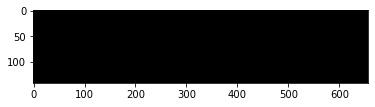

Espectrogramas Reales


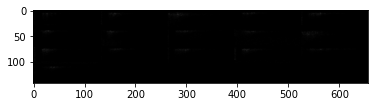

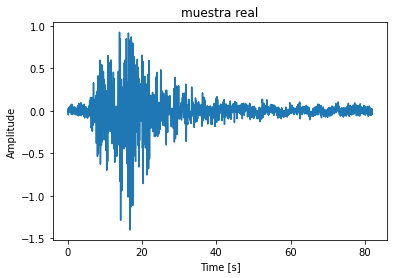

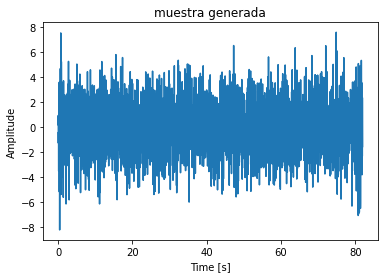

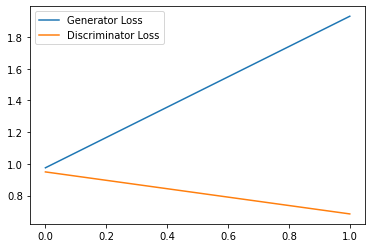

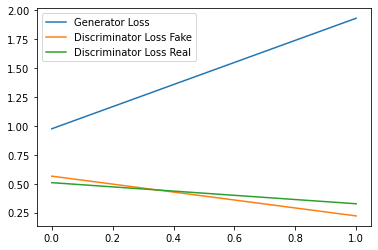

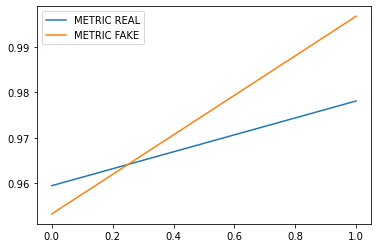

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 100: Generator loss: 3.308907890319824, discriminator loss: 0.4774877208471298
Espectrogramas Generados


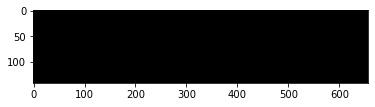

Espectrogramas Reales


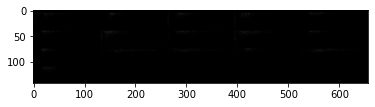

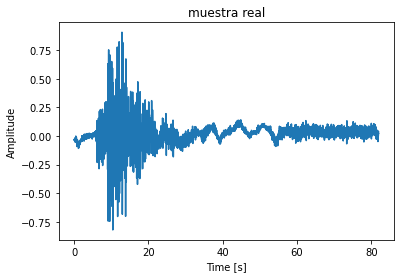

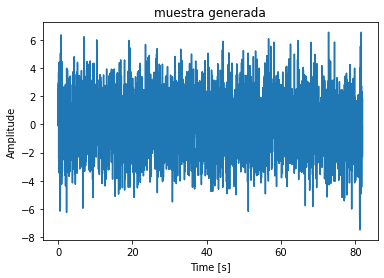

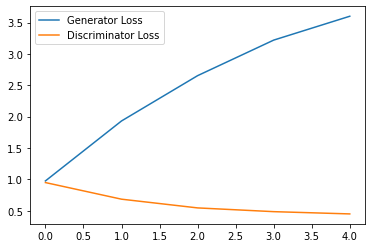

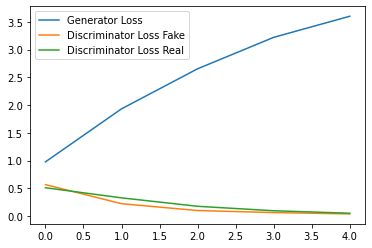

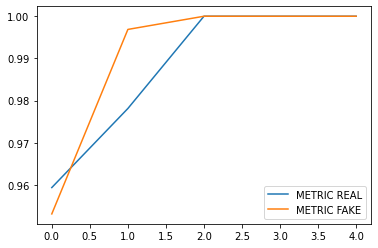

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 150: Generator loss: 4.3215704870224, discriminator loss: 0.4323111641407013
Espectrogramas Generados


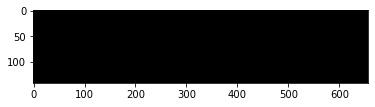

Espectrogramas Reales


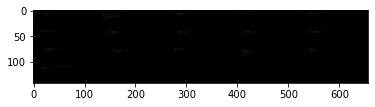

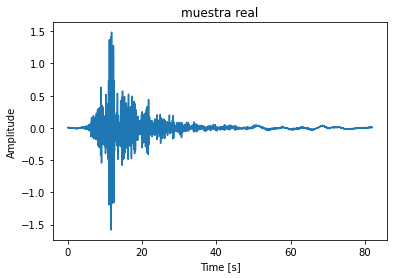

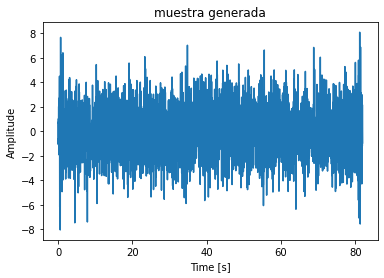

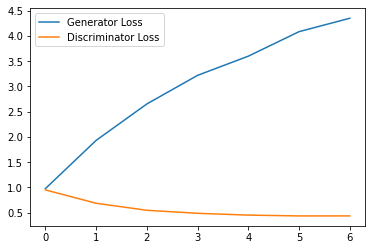

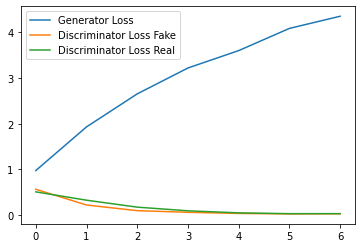

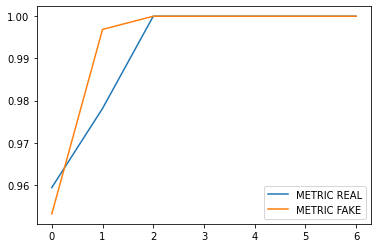

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 200: Generator loss: 4.432234292030334, discriminator loss: 0.493114795088768
Espectrogramas Generados


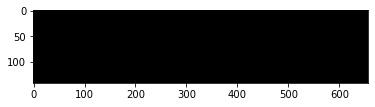

Espectrogramas Reales


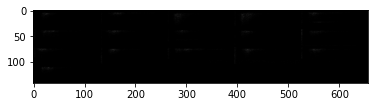

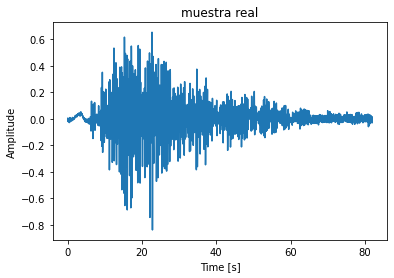

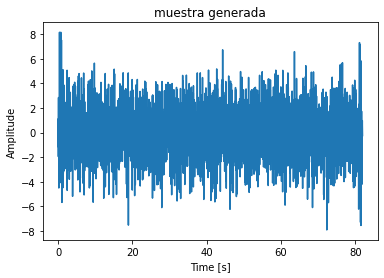

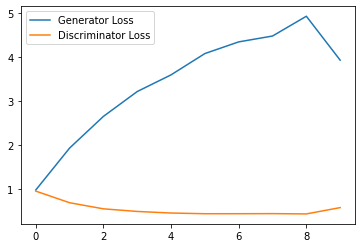

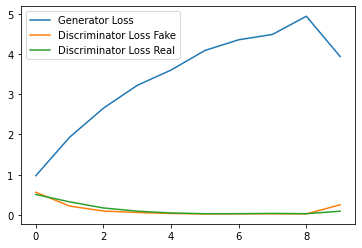

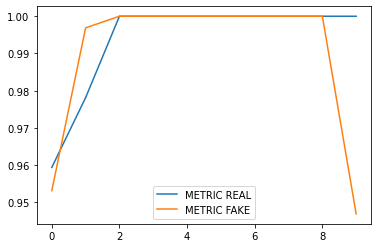

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 250: Generator loss: 4.576706233024598, discriminator loss: 0.494455486536026
Espectrogramas Generados


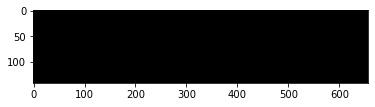

Espectrogramas Reales


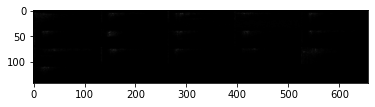

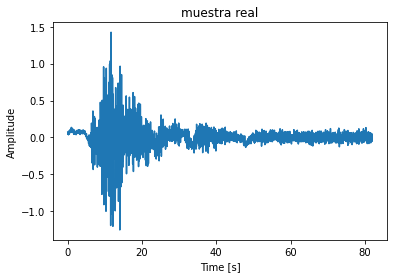

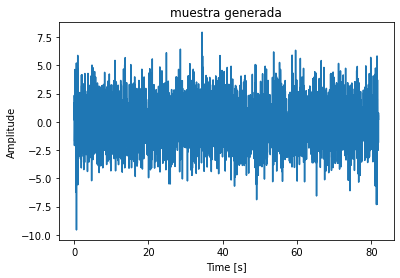

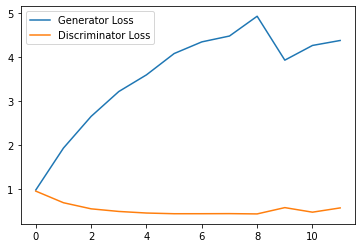

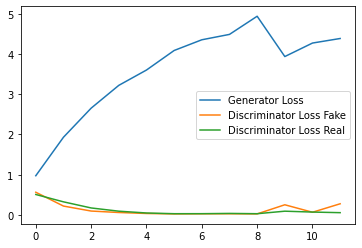

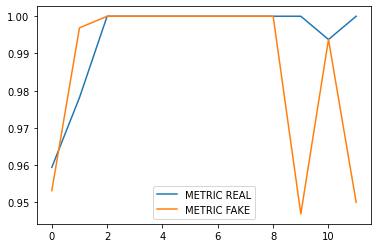

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 300: Generator loss: 4.317672309875488, discriminator loss: 0.46657034397125247
Espectrogramas Generados


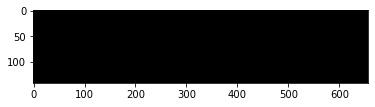

Espectrogramas Reales


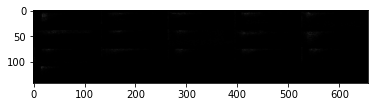

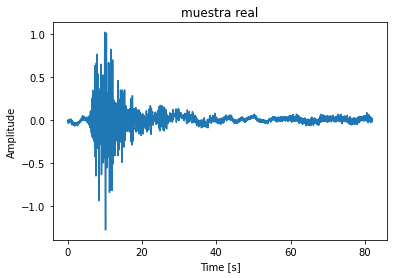

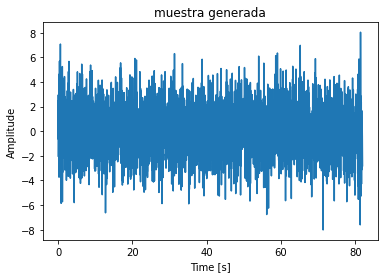

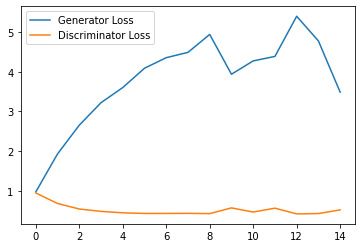

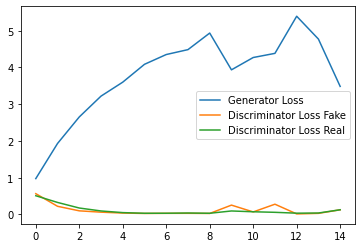

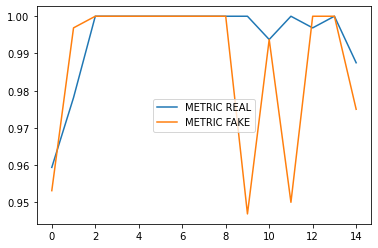

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 350: Generator loss: 4.058405771255493, discriminator loss: 0.5168359982967377
Espectrogramas Generados


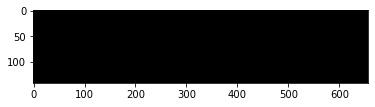

Espectrogramas Reales


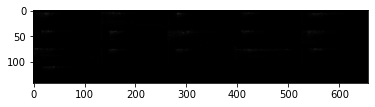

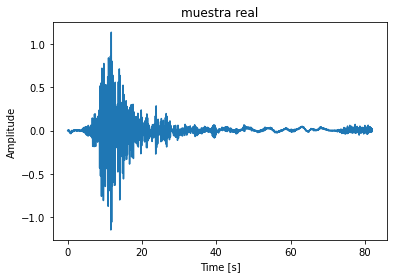

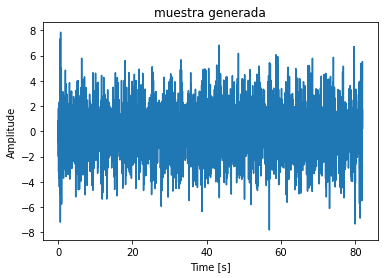

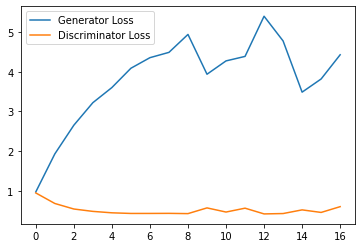

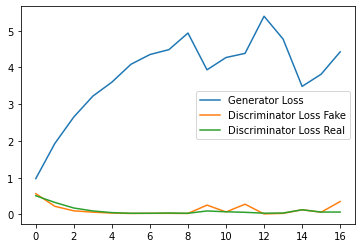

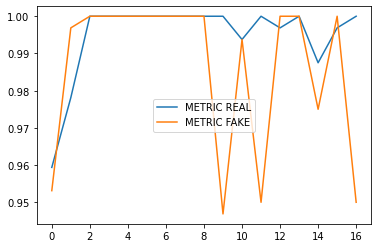

Epoch: 1


  0%|          | 0/385 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 400: Generator loss: 3.357041604714468, discriminator loss: 0.5832765936851502
Espectrogramas Generados


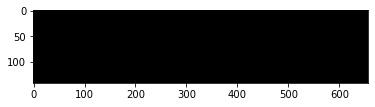

Espectrogramas Reales


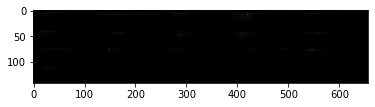

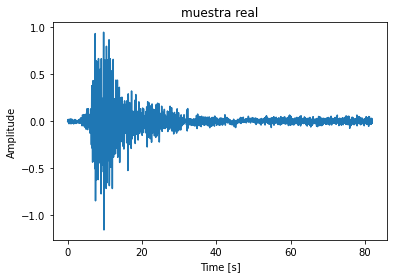

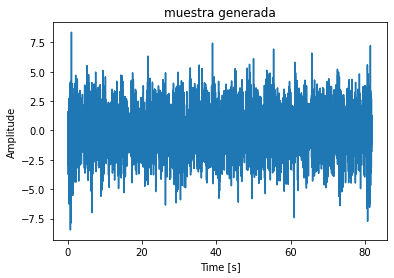

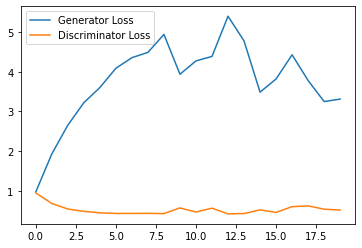

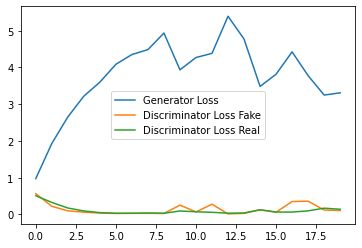

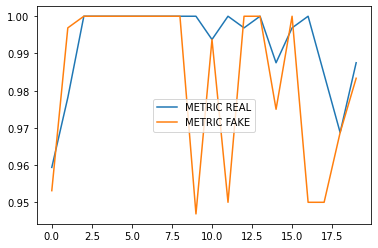

KeyboardInterrupt: 

In [12]:
cur_step = 0
generator_losses = []
discriminator_losses = []
discriminator_losses_real = []
discriminator_losses_fake = []
metric_real = []
metric_fake = [] 

for epoch in range(epoch_temp + 1, n_epochs):
    print('Epoch: ' + str(epoch))
    # Dataloader returns the batches and the labels
    for real, labels in tqdm(dataloader):
        cur_batch_size = len(real)
        # Flatten the batch of real images from the dataset
        real = real.to(device)

        one_hot_labels = auxiliares.get_one_hot_labels(labels.to(device), n_classes)
        image_one_hot_labels = one_hot_labels[:, :, None, None]
        image_one_hot_labels = image_one_hot_labels.repeat(1, 1, mnist_shape[1], mnist_shape[2])

        ### Update discriminator ###
        # Zero out the discriminator gradients
        disc_opt.zero_grad()
        # Get noise corresponding to the current batch_size 
        fake_noise = auxiliares.get_noise(cur_batch_size, z_dim, device=device)
        
        # Now you can get the images from the generator
        # Steps: 1) Combine the noise vectors and the one-hot labels for the generator
        #        2) Generate the conditioned fake images
       
        noise_and_labels = auxiliares.combine_vectors(fake_noise, one_hot_labels)
        fake = gen(noise_and_labels)#gen.forward(noise_and_labels) no usar

        # Now you can get the predictions from the discriminator
        # Steps: 1) Create the input for the discriminator
        #           a) Combine the fake images with image_one_hot_labels, 
        #              remember to detach the generator (.detach()) so you do not backpropagate through it
        #           b) Combine the real images with image_one_hot_labels
        #        2) Get the discriminator's prediction on the fakes as disc_fake_pred
        #        3) Get the discriminator's prediction on the reals as disc_real_pred
        
        fake_image_and_labels = auxiliares.combine_vectors(fake.detach(), image_one_hot_labels)
        real_image_and_labels = auxiliares.combine_vectors(real, image_one_hot_labels)
        disc_fake_pred = disc(fake_image_and_labels)
        disc_real_pred = disc(real_image_and_labels)               
        disc_fake_loss = criterion(disc_fake_pred, torch.zeros_like(disc_fake_pred))
        disc_real_loss = criterion(disc_real_pred, torch.ones_like(disc_real_pred))

        metric_fake += [metric(disc_fake_pred, torch.zeros_like(disc_fake_pred)).item()]
        metric_real += [metric(disc_real_pred, torch.ones_like(disc_real_pred)).item()]
        
        #Reg
        
        reg_lambda = 0.001
        l2_reg = None
        for W in disc.parameters():
            if l2_reg is None:
                l2_reg = W.norm(2)
            else:
                l2_reg = l2_reg + W.norm(2)
        
        disc_loss = ((disc_fake_loss + disc_real_loss)/2)  + l2_reg * reg_lambda
        disc_loss.backward(retain_graph=True)
        disc_opt.step() 

        # Keep track of the average discriminator loss
        discriminator_losses_real += [disc_real_loss.item()]
        discriminator_losses_fake+= [disc_fake_loss.item()]
        discriminator_losses += [disc_loss.item()]

        ### Update generator ###
        # Zero out the generator gradients
        gen_opt.zero_grad()

        fake_image_and_labels = auxiliares.combine_vectors(fake, image_one_hot_labels)
        # This will error if you didn't concatenate your labels to your image correctly
        disc_fake_pred = disc(fake_image_and_labels)
        gen_loss = criterion(disc_fake_pred, torch.ones_like(disc_fake_pred))
        gen_loss.backward()
        gen_opt.step()

        # Keep track of the generator losses
        generator_losses += [gen_loss.item()]
        #

        if cur_step % display_step == 0 and cur_step > 0:
            gen_mean = sum(generator_losses[-display_step:]) / display_step
            disc_mean = sum(discriminator_losses[-display_step:]) / display_step
            print(f"Step {cur_step}: Generator loss: {gen_mean}, discriminator loss: {disc_mean}")
            print(f"Espectrogramas Generados")
            visualizacion.show_tensor_images(torch.transpose(fake, 2, 3), size=(1, 129, 33))
            print(f"Espectrogramas Reales")
            visualizacion.show_tensor_images(torch.transpose(real, 2, 3), size=(1, 129, 33))
            visualizacion.show_time_domine_images(torch.transpose(real, 2, 3), size=(1, 129, 33), std=std, mean=mean, real = True)
            visualizacion.show_time_domine_images(torch.transpose(fake, 2, 3), size=(1, 129, 33), std=std, mean=mean, real = False)
            step_bins = 20
            x_axis = sorted([i * step_bins for i in range(len(generator_losses) // step_bins)] * step_bins)
            num_examples = (len(generator_losses) // step_bins) * step_bins
            plt.plot(
                range(num_examples // step_bins), 
                torch.Tensor(generator_losses[:num_examples]).view(-1, step_bins).mean(1),
                label="Generator Loss"
            )
            plt.plot(
                range(num_examples // step_bins), 
                torch.Tensor(discriminator_losses[:num_examples]).view(-1, step_bins).mean(1),
                label="Discriminator Loss"
            )
            plt.legend()
            
            plt.show()
            plt.plot(
                range(num_examples // step_bins), 
                torch.Tensor(generator_losses[:num_examples]).view(-1, step_bins).mean(1),
                label="Generator Loss"
            )
            plt.plot(
                range(num_examples // step_bins), 
                torch.Tensor(discriminator_losses_fake[:num_examples]).view(-1, step_bins).mean(1),
                label="Discriminator Loss Fake"
            )
            plt.plot(
                range(num_examples // step_bins), 
                torch.Tensor(discriminator_losses_real[:num_examples]).view(-1, step_bins).mean(1),
                label="Discriminator Loss Real"
            )
            plt.legend()
            
            plt.show()
            plt.plot(
                range(num_examples // step_bins), 
                torch.Tensor(metric_real[:num_examples]).view(-1, step_bins).mean(1),
                label="METRIC REAL"
            )
            plt.plot(
                range(num_examples // step_bins), 
                torch.Tensor(metric_fake[:num_examples]).view(-1, step_bins).mean(1),
                label="METRIC FAKE"
            )
            plt.legend()
            plt.show()
        elif cur_step == 0:
            print("Red Funcionando")
        cur_step += 1 
    if((guardar and epoch % save_steep == 0) or epoch == n_epochs - 1):
        Checkpoint.save_weighs(gen, disc, gen_opt, disc_opt, epoch, gen_loss, disc_loss, nombre)
        print('epoch guardada')                

In [ ]:
#gen.state_dict()

In [ ]:
from torchvision import models
from torchsummary import summary

summary(gen, (66,1,1))

summary(disc, (3,129,33))

In [ ]:
gen.eval()
disc.eval()

In [ ]:
import PrePross.grifflin as grifflin
import numpy as np

examples = 1

for i in range(examples):
    x = torch.tensor([1])
    one_hot_labels = auxiliares.get_one_hot_labels(x.to(device), n_classes)
    fake_noise = auxiliares.get_noise(1, z_dim, device=device)
    noise_and_labels = auxiliares.combine_vectors(fake_noise, one_hot_labels)
    fake = gen(noise_and_labels)
    fake = fake.cpu().detach().numpy()
    
    #fake = real[1].cpu().detach().numpy()
    #fake = np.expand_dims(fake, axis=1)
    
    #real, label = myData.__getitem__(852)
    #fake = real.cpu().detach().numpy()
    #fake = np.expand_dims(fake, axis=1)
    
    fake = fake * std + mean
    samplerate = 50
    timee, muestra_rec=grifflin.reconstruir_señal_generador(fake, 1000, samplerate)
    muestra_rec = np.squeeze(muestra_rec)
    tamaño = len(muestra_rec) / samplerate
    time = np.linspace(0., tamaño, len(muestra_rec))
    plt.plot(time,muestra_rec)
    plt.title("Señal Recuperada")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.show()
    

In [ ]:
print(real)